In [1]:
import math
import numpy as np
from numpy.random import normal as normal
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy import stats as sts
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format

In [2]:
df = pd.read_csv("Inc_Exp_Data.csv")
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [3]:
df["Inc_After_Exp"] = df["Mthly_HH_Income"] - df["Mthly_HH_Expense"]
df["Qualification_Num"] = df["Highest_Qualified_Member"]
num_values = {
    "Illiterate" : "0",
    "Under-Graduate" : "1",
    "Graduate" : "2",
    "Post-Graduate" : "3",
    "Professional" : "4"
}
for i in range(len(df["Qualification_Num"])):
    df["Qualification_Num"][i] = num_values[df["Qualification_Num"][i]]
df = df.astype({'Qualification_Num':'int64'})
df

C:\Users\test\AppData\Local\Temp\ipykernel_11936\2876986243.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Qualification_Num"][i] = num_values[df["Qualification_Num"][i]]


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Inc_After_Exp,Qualification_Num
0,5000,8000,3,2000,64200,Under-Graduate,1,-3000,1
1,6000,7000,2,3000,79920,Illiterate,1,-1000,0
2,10000,4500,2,0,112800,Under-Graduate,1,5500,1
3,10000,2000,1,0,97200,Illiterate,1,8000,0
4,12500,12000,2,3000,147000,Graduate,1,500,2
5,14000,8000,2,0,196560,Graduate,1,6000,2
6,15000,16000,3,35000,167400,Post-Graduate,1,-1000,3
7,18000,20000,5,8000,216000,Graduate,1,-2000,2
8,19000,9000,2,0,218880,Under-Graduate,1,10000,1
9,20000,9000,4,0,220800,Under-Graduate,2,11000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
 7   Inc_After_Exp             50 non-null     int64 
 8   Qualification_Num         50 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.6+ KB


In [6]:
df.shape

(50, 9)

In [7]:
numdf = df.select_dtypes(include = ["int64"])
numdf.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,Inc_After_Exp,Qualification_Num
0,5000,8000,3,2000,64200,1,-3000,1
1,6000,7000,2,3000,79920,1,-1000,0
2,10000,4500,2,0,112800,1,5500,1
3,10000,2000,1,0,97200,1,8000,0
4,12500,12000,2,3000,147000,1,500,2


In [8]:
stats = numdf.describe()
stats.loc["iqr"] = list(stats.loc["75%"] - stats.loc["25%"])
stats.loc["mode"] = list(numdf.mode().loc[0])
stats.loc["range"] = list(numdf.apply(lambda x: x.max() - x.min()))
stats.loc["var"] = list(stats.loc["std"].apply(lambda x: x**2))
stats.loc["mad"] = list(numdf.mad())
stats

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,Inc_After_Exp,Qualification_Num
count,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000
mean,41558.00000,18818.00000,4.06000,3060.00000,490019.04000,1.46000,22740.00000,2.12000
std,26097.90898,12090.21682,1.51738,6241.43495,320135.79212,0.73429,20434.80424,1.23949
min,5000.00000,2000.00000,1.00000,0.00000,64200.00000,1.00000,-3000.00000,0.00000
25%,23550.00000,10000.00000,3.00000,0.00000,258750.00000,1.00000,8250.00000,1.00000
50%,35000.00000,15500.00000,4.00000,0.00000,447420.00000,1.00000,17000.00000,2.00000
75%,50375.00000,25000.00000,5.00000,3500.00000,594720.00000,2.00000,31000.00000,3.00000
max,100000.00000,50000.00000,7.00000,35000.00000,1404000.00000,4.00000,73000.00000,4.00000
iqr,26825.00000,15000.00000,2.00000,3500.00000,335970.00000,1.00000,22750.00000,2.00000
mode,45000.00000,25000.00000,4.00000,0.00000,590400.00000,1.00000,10000.00000,2.00000


In [9]:
stats.cov()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,Inc_After_Exp,Qualification_Num
Mthly_HH_Income,35680398050115344.00000,7656922369684353.00000,-267060364.55961,2040461037668922.25000,5369198756433674240.00000,-263525971.75815,21875531308876448.00000,-235384000.44812
Mthly_HH_Expense,7656922369684353.00000,1643156079505701.25000,-57338864.79739,437877813348610.06250,1152216316104727040.00000,-56588360.45132,4694433235706356.00000,-50547070.38775
No_of_Fly_Members,-267060364.55961,-57338864.79739,170.28487,-15279655.20793,-40172830775.83447,175.60144,-163730736.19615,173.97652
Emi_or_Rent_Amt,2040461037668922.25000,437877813348610.06250,-15279655.20793,116688315328876.59375,307049251702205952.00000,-15082110.42104,1250999835648470.50000,-13472542.46631
Annual_HH_Income,5369198756433674240.00000,1152216316104727040.00000,-40172830775.83447,307049251702205952.00000,807958919961662062592.00000,-39637184447.74802,3291837569929123840.00000,-35403281362.86060
No_of_Earning_Members,-263525971.75815,-56588360.45132,175.60144,-15082110.42104,-39637184447.74802,182.37517,-161563976.25503,180.31875
Inc_After_Exp,21875531308876448.00000,4694433235706356.00000,-163730736.19615,1250999835648470.50000,3291837569929123840.00000,-161563976.25503,13411814300701864.00000,-144309669.83613
Qualification_Num,-235384000.44812,-50547070.38775,173.97652,-13472542.46631,-35403281362.86060,180.31875,-144309669.83613,178.64096


In [10]:
stats.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,Inc_After_Exp,Qualification_Num
Mthly_HH_Income,1.00000,1.00000,-0.10834,1.00000,1.00000,-0.10331,1.00000,-0.09323
Mthly_HH_Expense,1.00000,1.00000,-0.10840,1.00000,1.00000,-0.10337,1.00000,-0.09330
No_of_Fly_Members,-0.10834,-0.10840,1.00000,-0.10840,-0.10831,0.99645,-0.10834,0.99750
Emi_or_Rent_Amt,1.00000,1.00000,-0.10840,1.00000,1.00000,-0.10339,1.00000,-0.09331
Annual_HH_Income,1.00000,1.00000,-0.10831,1.00000,1.00000,-0.10326,1.00000,-0.09319
No_of_Earning_Members,-0.10331,-0.10337,0.99645,-0.10339,-0.10326,1.00000,-0.10330,0.99900
Inc_After_Exp,1.00000,1.00000,-0.10834,1.00000,1.00000,-0.10330,1.00000,-0.09323
Qualification_Num,-0.09323,-0.09330,0.99750,-0.09331,-0.09319,0.99900,-0.09323,1.00000


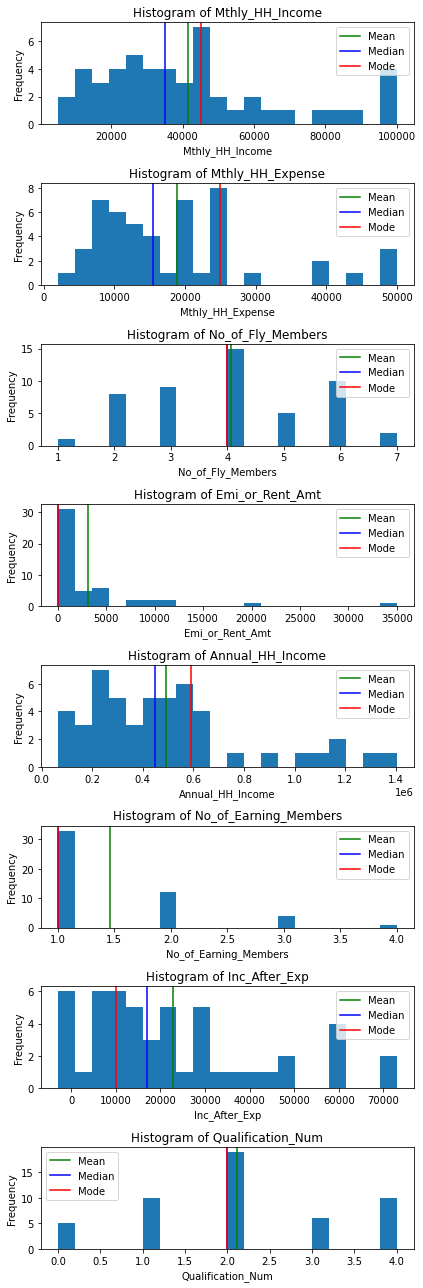

In [11]:
fig, axes = plt.subplots(nrows = len(numdf.columns), ncols = 1, figsize = (6, 18))

i = 0
for ax in axes:
    mean = numdf[numdf.columns[i]].mean()
    median = numdf[numdf.columns[i]].median()
    mode = numdf[numdf.columns[i]].mode()
    
    ax.hist(numdf[numdf.columns[i]], bins = 20)

    mean_line = ax.axvline(mean, color='green', label='Mean')
    median_line = ax.axvline(median, color='blue', label='Median')
    mode_line = ax.axvline(mode[0], color='red', label='Mode')
    
    ax.legend(handles=[mean_line, median_line, mode_line])

    ax.set_xlabel(numdf.columns[i])
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of " + numdf.columns[i])
    i = i + 1

plt.tight_layout()
plt.show()

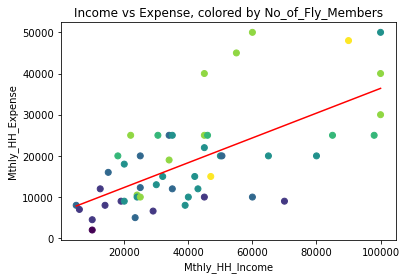

In [13]:
plt.scatter(df["Mthly_HH_Income"], df["Mthly_HH_Expense"], c=df["No_of_Fly_Members"])
gradient, intercept, r_value, p_value, std_err = sts.linregress(df["Mthly_HH_Income"],df["Mthly_HH_Expense"])
x1 = np.linspace(np.min(df["Mthly_HH_Income"]),np.max(df["Mthly_HH_Income"]),500)
y1 = gradient * x1 + intercept
plt.xlabel("Mthly_HH_Income")
plt.ylabel("Mthly_HH_Expense")
plt.title("Income vs Expense, colored by No_of_Fly_Members")
plt.plot(x1,y1,'-r')
plt.show()

C:\Users\test\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_Fly_Members', ylabel='Qualification_Num'>

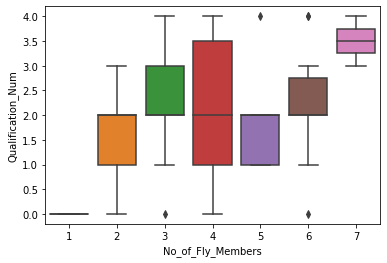

In [66]:
sns.boxplot(df["No_of_Fly_Members"], df["Qualification_Num"])

C:\Users\test\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_Fly_Members', ylabel='Qualification_Num'>

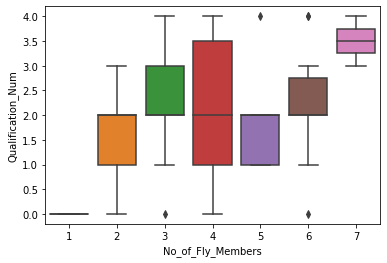

In [66]:
sns.boxplot(df["No_of_Fly_Members"], df["Qualification_Num"])

C:\Users\test\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_Fly_Members', ylabel='Qualification_Num'>

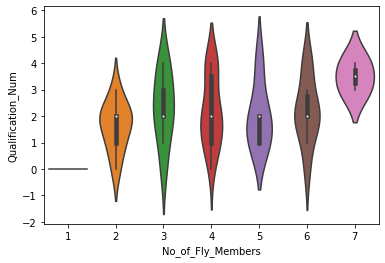

In [67]:
sns.violinplot(df["No_of_Fly_Members"], df["Qualification_Num"])

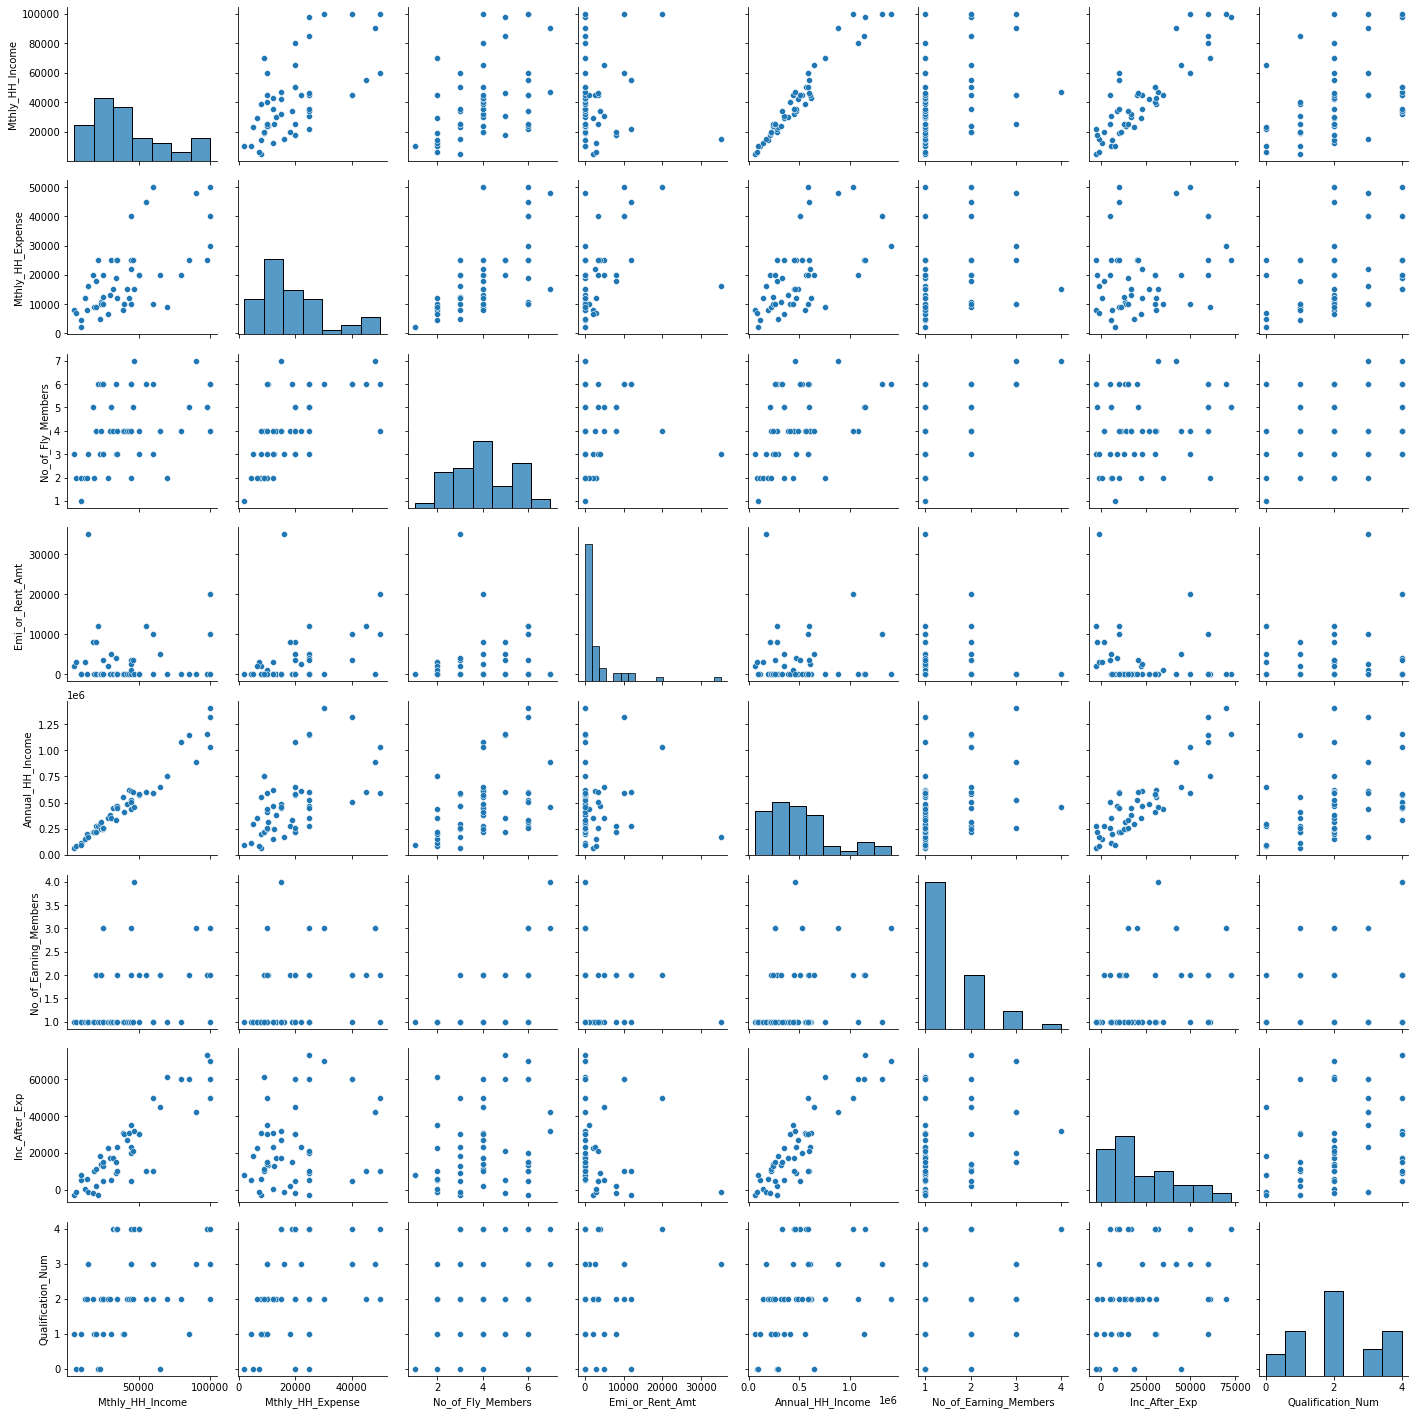

In [68]:
sns.pairplot(df)

<AxesSubplot:>

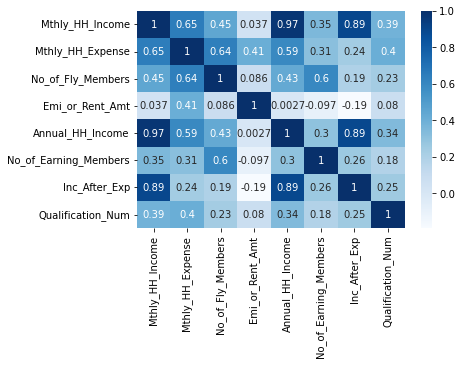

In [65]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)

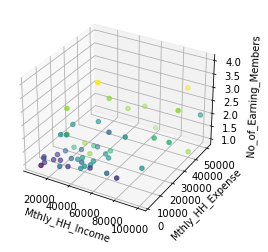

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = df["Mthly_HH_Income"]
ys = df["Mthly_HH_Expense"]
zs = df["No_of_Earning_Members"]
ax.scatter(xs, ys, zs, c=df["No_of_Fly_Members"])

ax.set_xlabel("Mthly_HH_Income")
ax.set_ylabel("Mthly_HH_Expense")
ax.set_zlabel("No_of_Earning_Members")

plt.show()

C:\Users\test\AppData\Local\Temp\ipykernel_5324\3654048881.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


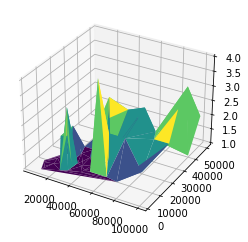

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df["Mthly_HH_Income"], df["Mthly_HH_Expense"], df["No_of_Earning_Members"], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

<IPython.core.display.Javascript object>


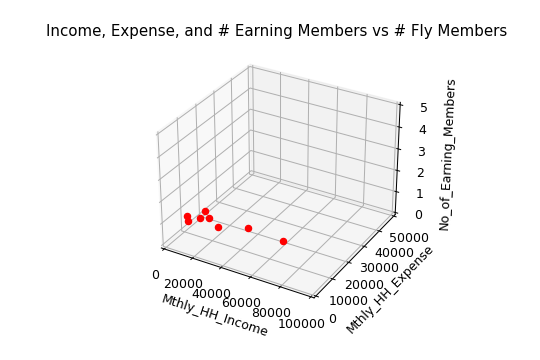

In [19]:
%matplotlib notebook
nfr = 20 # Number of frames
fps = 10 # Frame per sec
xs = []
ys = []
zs = []
ss = np.arange(1,nfr,0.5)

for s in ss:
    for i in range(1,8):
        xs.append(df[df["No_of_Fly_Members"] == i]["Mthly_HH_Income"])
        ys.append(df[df["No_of_Fly_Members"] == i]["Mthly_HH_Expense"])
        zs.append(df[df["No_of_Fly_Members"] == i]["No_of_Earning_Members"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", c="r", markersize=5)

def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
    
ax.set_xlim(0,100000)
ax.set_ylim(0,50000)
ax.set_zlim(0,5)

ax.set_xlabel("Mthly_HH_Income")
ax.set_ylabel("Mthly_HH_Expense")
ax.set_zlabel("No_of_Earning_Members")

plt.title("Income, Expense, and # Earning Members vs # Fly Members")

ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000/fps)

In [79]:
%matplotlib notebook
nfr = 30
fps = 5
xs = []
ys = []
zs = []
ss = np.arange(1,nfr,0.5)
A = df["Mthly_HH_Income"]/1000
B = df["Mthly_HH_Expense"]/1000
C = df["No_of_Earning_Members"]
D = df["No_of_Fly_Members"]

for s in ss:
    for i in range(1,8):
        xs.append(df[D == i]["Mthly_HH_Income"]/1000)
        ys.append(df[D == i]["Mthly_HH_Expense"]/1000)
        zs.append(df[D == i]["No_of_Earning_Members"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", c="blue", markersize=4, zorder=1000)

def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
    
ax.set_xlim(0,100)
ax.set_ylim(0,50)
ax.set_zlim(0.5,4.5)

ax.set_xlabel("Income, in 1000s")
ax.set_ylabel("Expense, in 1000s")
ax.set_zlabel("No_of_Earning_Members")

plt.title("Income, Expense, and # Earning Members vs # Fly Members")

ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000/fps)

ax.scatter(df["Mthly_HH_Income"]/1000, df["Mthly_HH_Expense"]/1000, df["No_of_Earning_Members"], c="r", zorder = 10)

ax = fig.gca(projection='3d')
ax.plot_trisurf(A, B, C, cmap="Wistia", linewidth=0.5, zorder = 0, edgecolors = "k")
ax.view_init(16, -37)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\test\AppData\Local\Temp\ipykernel_5324\4226936226.py:41: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [ ]:
%matplotlib notebook
nfr = 30
fps = 5
xs = []
ys = []
zs = []
ss = np.arange(1,nfr,0.5)
A = df["Inc_After_Exp"]/1000
B = df["Qualification_Num"]
C = df["No_of_Earning_Members"]
D = df["No_of_Fly_Members"]

for s in ss:
    for i in range(1,8):
        xs.append(df[D == i]["Inc_After_Exp"]/1000)
        ys.append(df[D == i]["Qualification_Num"])
        zs.append(df[D == i]["No_of_Earning_Members"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", c="blue", markersize=4, zorder=1000)

def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
    
ax.set_xlim(0,70)
ax.set_ylim(0,5)
ax.set_zlim(0.5,4.5)

ax.set_xlabel("Income After Expense, in 1000s")
ax.set_ylabel("Qualification Number")
ax.set_zlabel("No_of_Earning_Members")

plt.title("Income, Qualification, and # Earning Members vs # Fly Members")

ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000/fps)

ax.scatter(df["Inc_After_Exp"]/1000, df["Qualification_Num"], df["No_of_Earning_Members"], c="r", zorder = 10)

ax = fig.gca(projection='3d')
ax.plot_trisurf(A, B, C, cmap="Wistia", linewidth=0.5, zorder = 0, edgecolors = "k")
ax.view_init(30, -70)
plt.show()

In [83]:
tempx = pd.read_html("https://data.cityofchicago.org/Environment-Sustainable-Development/Chicago-Energy-Benchmarking-2014-Data-Reported-in-/tepd-j7h5/data")
tempx

ValueError: No tables found